In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
from Preprocessor import Preprocessor
from Registerer import Registerer
import SimpleITK as sitk
import ndreg
import numpy as np

### Step 1: Load data

In [4]:
img = ndreg.imgRead('../forVikram/ailey-dev_thy1eyfp_control_9_upload20170919_ch1_res3.img')
atlas = ndreg.imgRead('../forVikram/average_template_10.1.tif')

In [5]:
img.SetSpacing((0.041279956, 0.041279956, 0.041279956))

In [6]:
atlas.SetSpacing((0.01, 0.01, 0.01))

### Step 2: initialize Preprocessor class

In [7]:
preprocessor = Preprocessor(img)

### Step 3: remove streaks

In [8]:
new_img = preprocessor.remove_streaks()

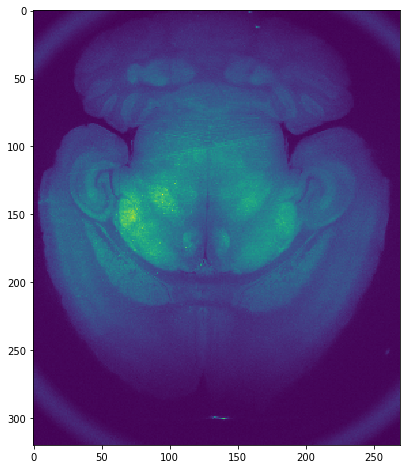

In [9]:
plt.imshow(preprocessor.img_np[80,:,:])
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


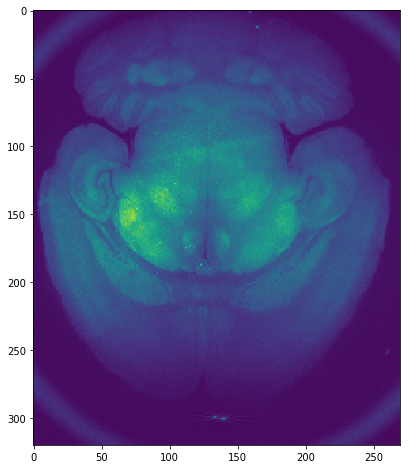

In [10]:
plt.imshow(new_img[80,:,:].astype('float'))
plt.show()

### Step 4: Remove circle

In [11]:
img_no_circle = preprocessor.remove_circle()

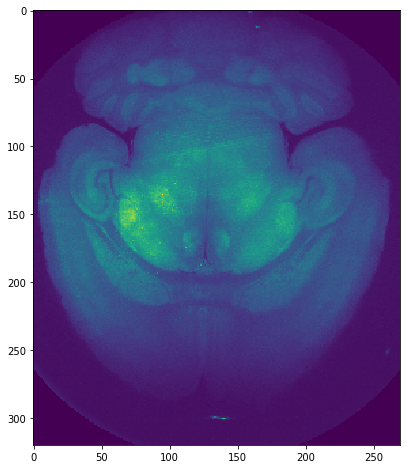

In [12]:
plt.imshow(img_no_circle[80,:,:])
plt.show()

### Step 5: create mask

In [13]:
mask = preprocessor.create_mask()

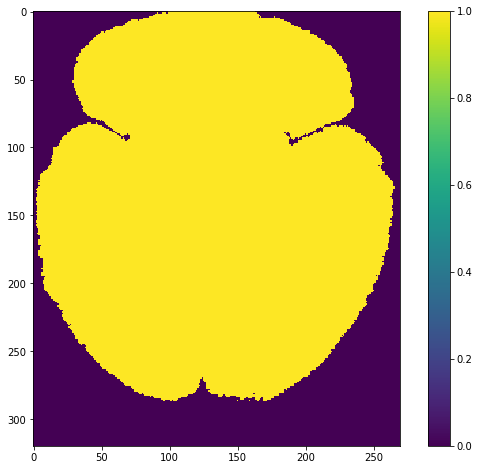

In [14]:
plt.imshow(mask[80,:,:])
plt.colorbar()
plt.show()

### Step 6: Correct Bias field

In [15]:
img_bias_corrected = preprocessor.correct_bias_field(mask=mask, scale=0.1)

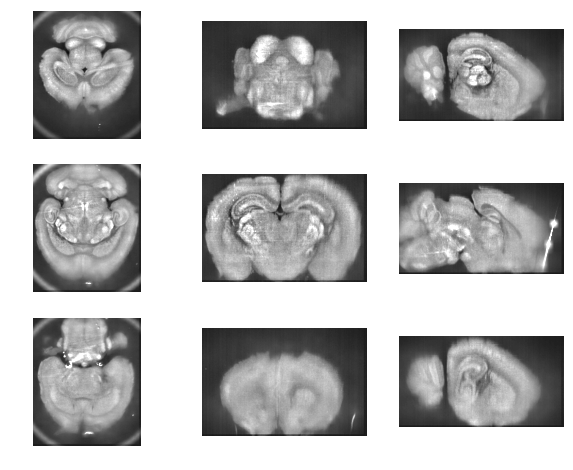

In [16]:
ndreg.imgShow(img_bias_corrected, vmax=1000)

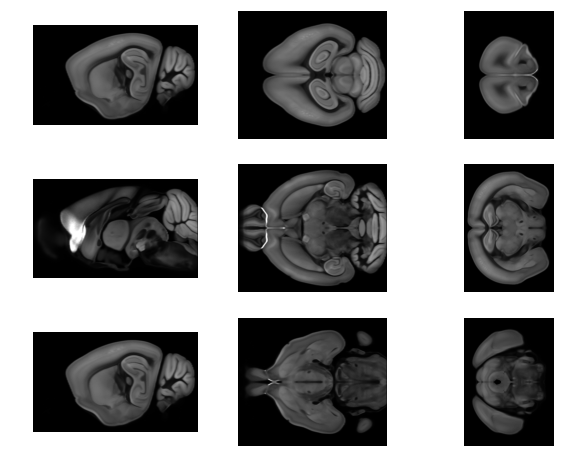

In [17]:
ndreg.imgShow(atlas)

## Registration

In [28]:
registerer = Registerer(atlas, img, "ASR", "LAS")

### Perform affine registration

In [29]:
atlas_affine = registerer.register_affine(0.100, iterations=2000.0, resolutions=8.0)

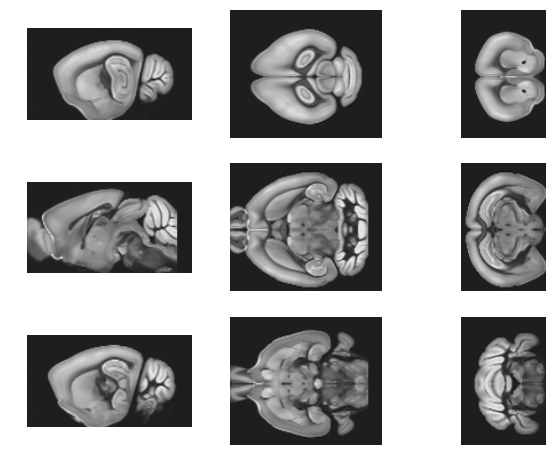

In [30]:
ndreg.imgShow(atlas_affine)

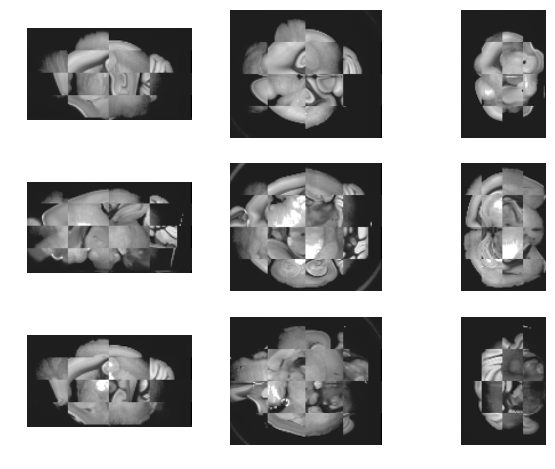

In [31]:
registerer.checkerboard_image()

### Perform LDDMM registration

In [32]:
# atlas_lddmm = registerer.register_lddmm(scaleList=[0.0625], epsilonList=5e-4)

In [33]:
# ndreg.imgShow(atlas_lddmm)

### Evaluate registration

In [34]:
mse = registerer.evaluate_affine_registration('../Manual Fiducials/Control9/average_template_10-landmarks.fcsv', 
                                 '../Manual Fiducials/Control9/Control9Auto-landmarks.fcsv', 
                                 0.01/10.0, 0.005159994528456835/1.0, "ASR", "ASL", "LAS")

In [35]:
np.mean(mse)

0.87538216886803744

In [36]:
np.median(mse)

0.91635224331989806